# IE 583 Final Project -- Group 5

We will be analyzing the title of 5000 randomly sampled articles from the given metadata.csv file.
The goal is to cluster two different datasets and then create a classification model based off of each article's respective cluster.
The first dataset used is of titles, but during preprocessing tf-idf was implemented.
The second dataset is of all titles placed into the form of a document-term matrix.
Each dataset will undergo PCA followed by t-SNE to assist with the visualization of the clustering algorithm.
After this the clustering predictions will be appended to the original dataset. These datasets will be saved and utilized again within the classification algorithm.
The plots of t-SNE were used from 
@inproceedings{COVID-19 Literature Clustering,
    author = {Eren, E. Maksim. Solovyev, Nick. Nicholas, Charles. Raff, Edward},
    title = {COVID-19 Literature Clustering},
    year = {2020},
    month = {April},
    location = {University of Maryland Baltimore County (UMBC), Baltimore, MD, USA},
    note={Malware Research Group},
    url = {\url{https://github.com/MaksimEkin/COVID19-Literature-Clustering}},
    howpublished = {TBA}
}

In [27]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from scipy.spatial.distance import cdist

from tqdm import tqdm

import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

seed = 1234

# Load and clean tf-idf dataset

In [3]:
#load and sample first dataset -- tf-idf of titles
#due to computing limitations the 5000 samples will only come from the first half of
#articles supplied in the metadata.csv file
tdm_1 = pd.read_csv('tdm_1.csv')

data_tfidf = tdm_1.sample(n=5000, random_state=seed)

data_tfidf.head()

,Unnamed: 0,africa,bomb,coronavirus,scientist,spread,tick,time,worry,breast,...,uk’s,harveian,orate,123847,cme,canute,christopher,columbus,singapore's,rollercoaster
18172,10.1016/S0262-4079(20)30471-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
16075,10.1016/j.vph.2008.06.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15388,10.1016/j.virol.2008.03.034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13842,10.1016/j.socscimed.2005.07.028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8610,10.1016/j.ddmod.2009.02.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#need to eliminate the Unnamed: 0 to run through algorithms
tfidf = data_tfidf.iloc[:, 1:]
tfidf.head()

,africa,bomb,coronavirus,scientist,spread,tick,time,worry,breast,cancer,...,uk’s,harveian,orate,123847,cme,canute,christopher,columbus,singapore's,rollercoaster
18172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
16075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## PCA for tf-idf dataset

In [5]:
pca = PCA(n_components = 0.95, random_state = seed)

In [6]:
tfidf_pca = pca.fit_transform(tfidf)
tfidf_pca.shape

(5000, 2468)

# t-SNE of tf-idf dataset -- for visualization

In [12]:
#t-SNE
tsne = TSNE(n_components = 2, verbose=5, perplexity=100, random_state = seed)
tfidf_tsne = tsne.fit_transform(tfidf_pca)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5000 samples in 4.083s...
[t-SNE] Computed neighbors for 5000 samples in 147.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.527935
[t-SNE] Computed conditional probabilities in 0.820s
[t-SNE] Iteration 50: error = 97.9124756, gradient norm = 0.1930559 (50 iterations in 5.764s)
[t-SNE] Iteration 100: error = 100.8168411, gradient norm = 0.1698097 (50 iterations in 6.235s)
[t-SNE] Iteration 150: error = 102.1973267, gradient norm = 0.1652133 (50 iterations in 5.741s)
[t-SNE] Iteration 200: error = 106.3742142, gradient norm = 0.1260050 (50 iterations in 5.593s)
[t-SNE] Iteration 250: error = 104.7536545, gradient norm = 0.

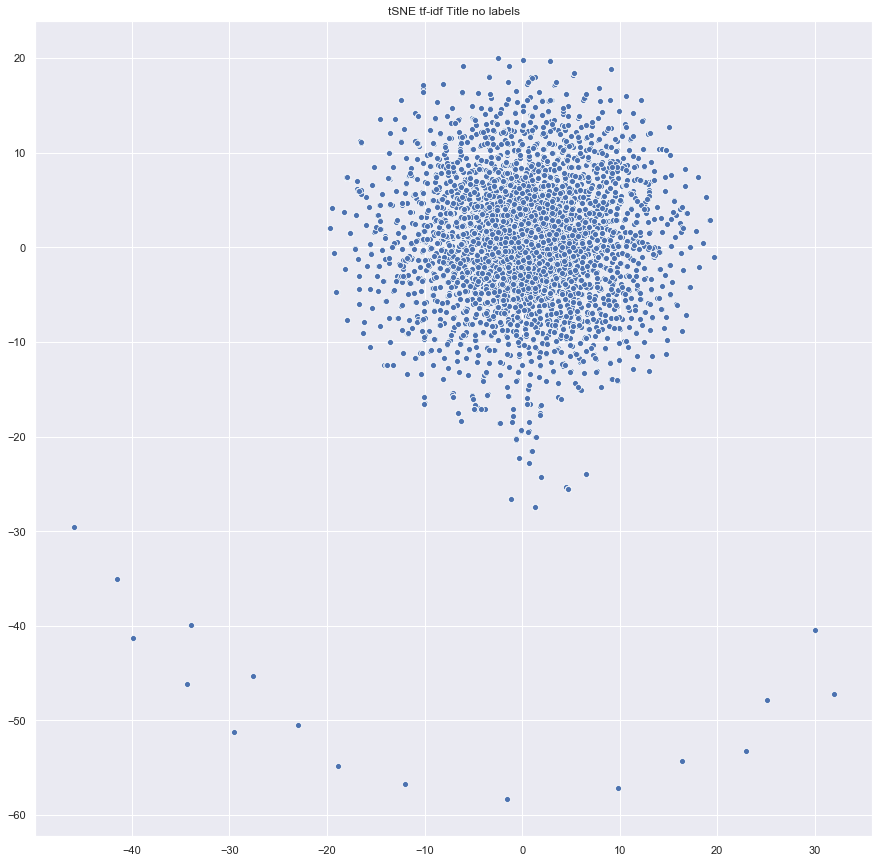

In [13]:
# initialize sns
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(tfidf_tsne[:,0], tfidf_tsne[:,1], palette=palette)
plt.title('tSNE tf-idf Title no labels')
plt.savefig("tsne_tfidf_title.png")
plt.show()

## KMeans for tf-idf_pca dataset

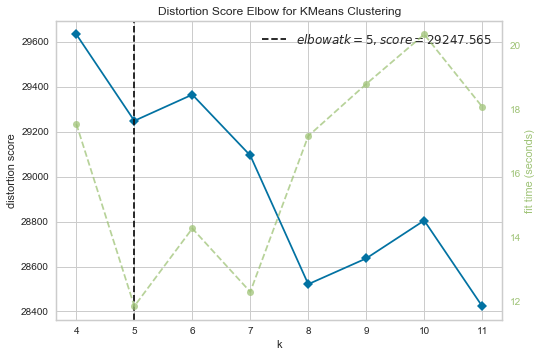

In [28]:
testModel = KMeans()

visualizer = KElbowVisualizer(testModel, k=(4,12))

visualizer.fit(tfidf_pca)        # Fit the data to the visualizer
visualizer.show()                # Finalize and render the figure

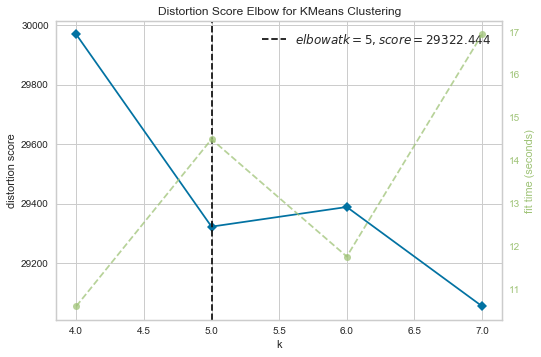

In [30]:
testModel_1 = KMeans(init='k-means++', algorithm='full')

visualizer_1 = KElbowVisualizer(testModel, k=(4,8))

visualizer_1.fit(tfidf_pca)        # Fit the data to the visualizer
visualizer_1.show()                # Finalize and render the figure

Very interesting, slight increase in distortion (score) when different initialization and algorithm type was used. algorithm = 'full' was selected because of the sparsity of the dataset.

In [31]:
# kmeans is run 10 times with centroid randomly initialized each time all with random_state = 1234
# for reproducibility. And then algorithm is set to full because of the sparsity of the dataset.
kmeans_tfidf = KMeans(n_clusters = 5, init='k-means++', n_init=10, random_state = seed, algorithm='full')
tfidf_preds = kmeans_tfidf.fit_predict(tfidf_pca)

The tfidf_preds will be appended onto the last column 'preds of the dataset 'tfidf' to be used later for classification.

The tfidf_preds will be appended onto the last column 'clusters' of the original 'data_tfidf' dataset with article descripters.

In [32]:
tfidf['preds'] = tfidf_preds
tfidf.head()

,africa,bomb,coronavirus,scientist,spread,tick,time,worry,breast,cancer,...,harveian,orate,123847,cme,canute,christopher,columbus,singapore's,rollercoaster,preds
18172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
16075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
15388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
13842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
8610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3


# t-SNE with cluster labels for kmeans visualization

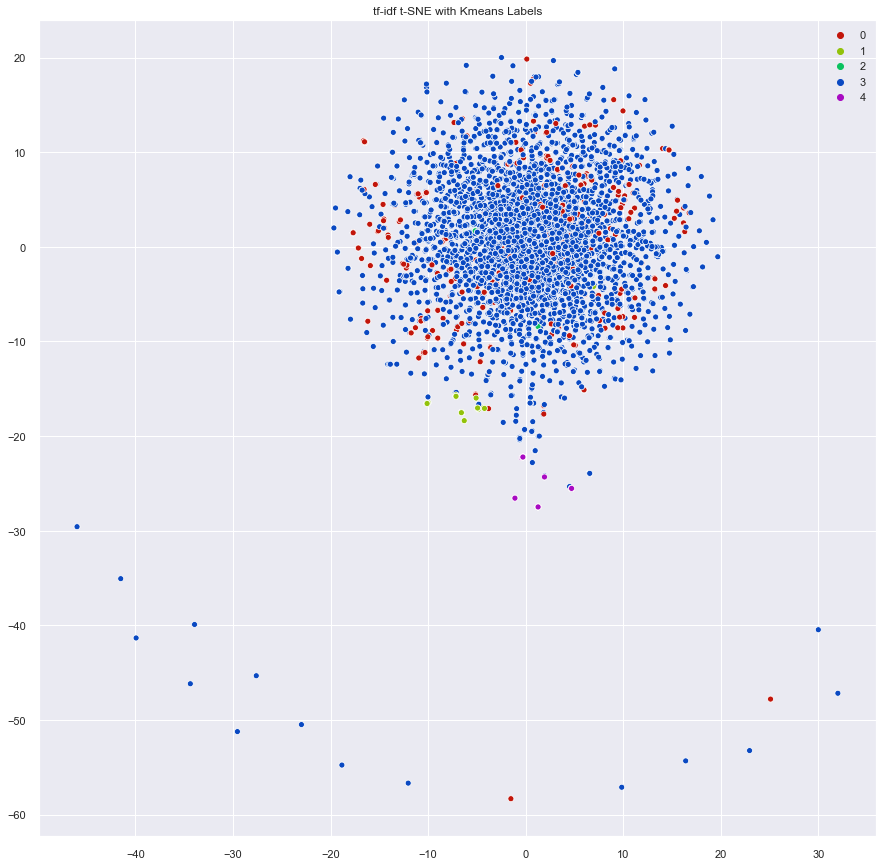

In [33]:
#initialize sns to overlay the clustering predictions
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(5, l=.4, s=.9)

# plot
sns.scatterplot(tfidf_tsne[:,0], tfidf_tsne[:,1], hue=tfidf_preds, legend='full', palette=palette)
plt.title('tf-idf t-SNE with Kmeans Labels')
plt.savefig("tfidf_pca_tsne_Group5.png")
plt.show()

Given the dataset, kmeans performed as expected. The distribution of the tf-idf articles is quite peculiar.

# Load and clean title document-term matrix

In [20]:
data_title = pd.read_csv('randomizedTitle_descripters.csv')
data_title.head()

,Unnamed: 0,title,publish_time,authors,journal,2019,activity,acute,among,analysis,...,system,tract,transmission,two,type,using,vaccine,viral,virus,viruses
0,1,Coronaviruses in bats from Mexico,NaN,"Anthony, S. J.; Ojeda-Flores, R.; Rico-Chávez,...",NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Nurse Participation in Continuing Education in...,2017-05-31,"Chen, I-Hui; Chang, Shu-Chuan; Feng, Jui-Ying;...",Journal of Emergency Nursing,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Commentary Considerations for Recommending Ext...,NaN,"Fisher, Edward M.; Shaffer, Ronald E.",NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The GAIT Translational Control System,NaN,"Arif, Abul; Yao, Peng; Terenzi, Fulvia; Jia, J...",NaN,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,"IS HUMAN RIGHTS PREPARED? RISK, RIGHTS AND PUB...",2009 May 8 Summer,"Murphy, Thérèse; Whitty, Noel",Med Law Rev,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#eliminate non-numeric columns for analysis
title = data_title.iloc[:,6:]
title.head()

,activity,acute,among,analysis,antibodies,antibody,antiviral,assay,associated,avian,...,system,tract,transmission,two,type,using,vaccine,viral,virus,viruses
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# t-SNE of document-term matrix dataset -- for visualization

In [23]:
title_tsne = tsne.fit_transform(title)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.169s...
[t-SNE] Computed neighbors for 5000 samples in 6.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 1.204s
[t-SNE] Iteration 50: error = 69.0624695, gradient norm = 0.0093261 (50 iterations in 7.774s)
[t-SNE] Iteration 100: error = 68.9863815, gradient norm = 0.0004133 (50 iterations in 6.370s)
[t-SNE] Iteration 150: error = 68.9408569, gradient norm = 0.0002695 (50 iterations in 5.330s)
[t-SNE] Iteration 200: error = 68.9369583, gradient norm = 0.0003476 (50 iterations in 5.253s)
[t-SNE] Iteration 250: error = 68.9352036, gradient norm = 0.000070

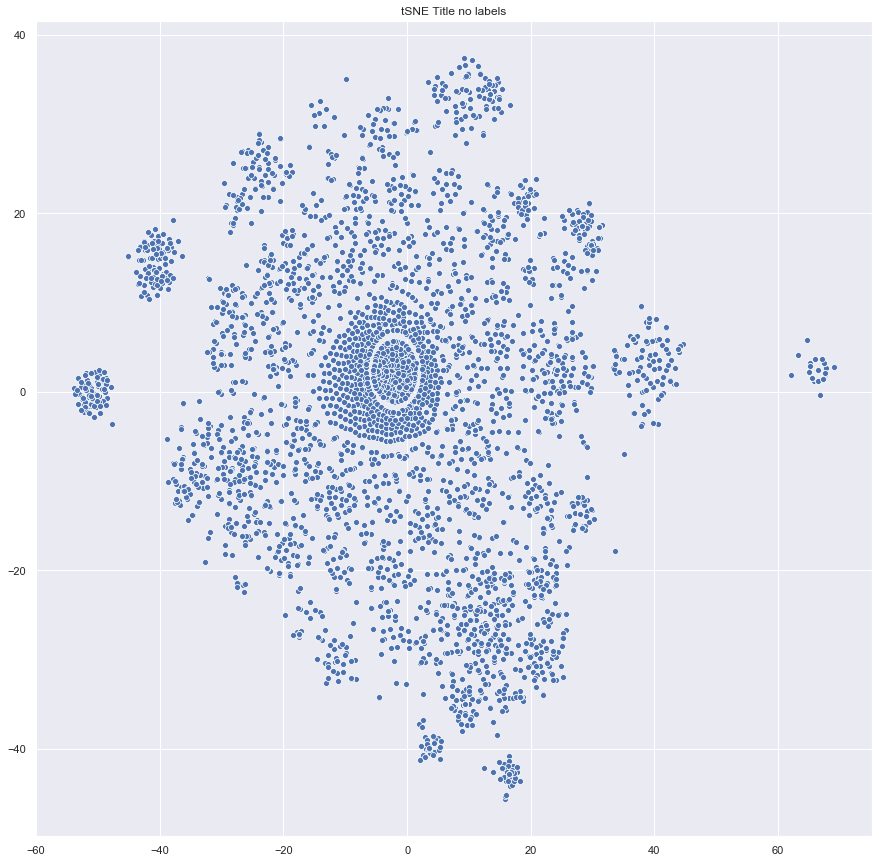

In [24]:
# initialize sns
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(title_tsne[:,0], title_tsne[:,1], palette=palette)
plt.title('tSNE Title no labels')
plt.savefig("tsne_title.png")
plt.show()

# kmeans for document-term title matrix dataset

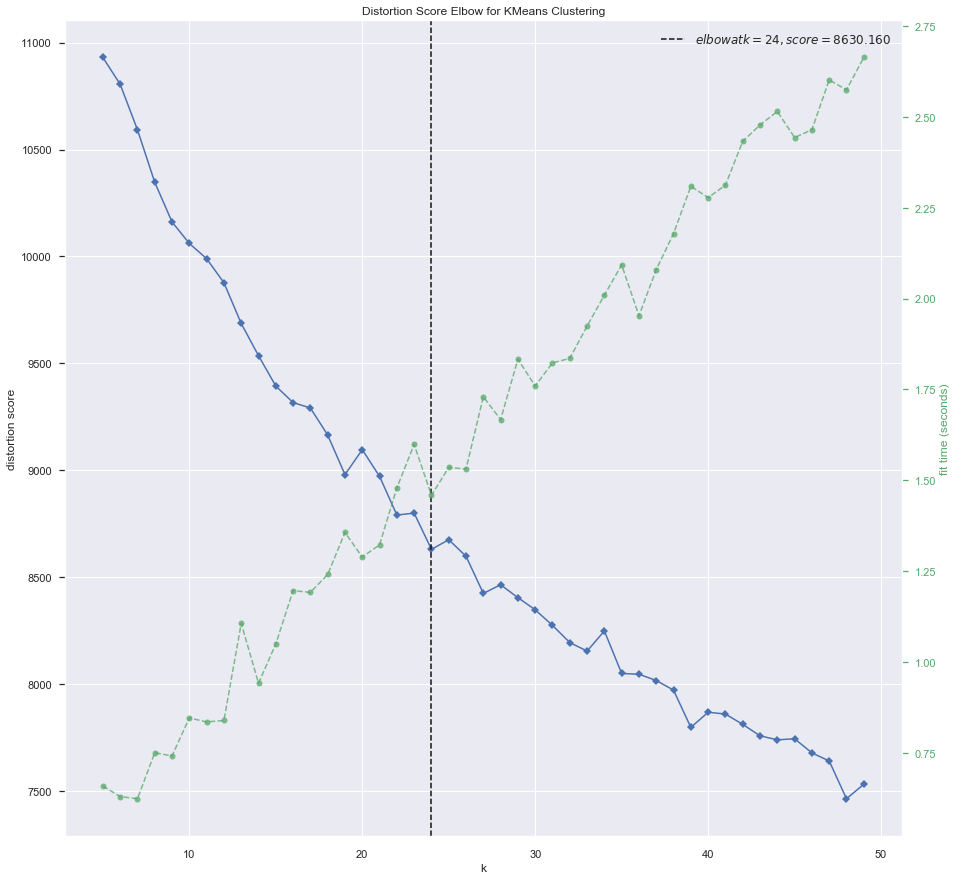

In [34]:
testModel_title = KMeans()

visualizer_title = KElbowVisualizer(testModel_title, k=(5,50))

visualizer_title.fit(title)        # Fit the data to the visualizer
visualizer_title.show()                # Finalize and render the figure

In [35]:
# the plot above shows that the optimal number of centroids is 24
kmeans_title = KMeans(n_clusters = 24, init='k-means++', n_init=10, random_state = seed, algorithm='full')

title_preds = kmeans_title.fit_predict(title)

In [36]:
data_title['preds'] = title_preds
data_title.head()

,Unnamed: 0,title,publish_time,authors,journal,2019,activity,acute,among,analysis,...,tract,transmission,two,type,using,vaccine,viral,virus,viruses,preds
0,1,Coronaviruses in bats from Mexico,NaN,"Anthony, S. J.; Ojeda-Flores, R.; Rico-Chávez,...",NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Nurse Participation in Continuing Education in...,2017-05-31,"Chen, I-Hui; Chang, Shu-Chuan; Feng, Jui-Ying;...",Journal of Emergency Nursing,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Commentary Considerations for Recommending Ext...,NaN,"Fisher, Edward M.; Shaffer, Ronald E.",NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,4,The GAIT Translational Control System,NaN,"Arif, Abul; Yao, Peng; Terenzi, Fulvia; Jia, J...",NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,"IS HUMAN RIGHTS PREPARED? RISK, RIGHTS AND PUB...",2009 May 8 Summer,"Murphy, Thérèse; Whitty, Noel",Med Law Rev,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


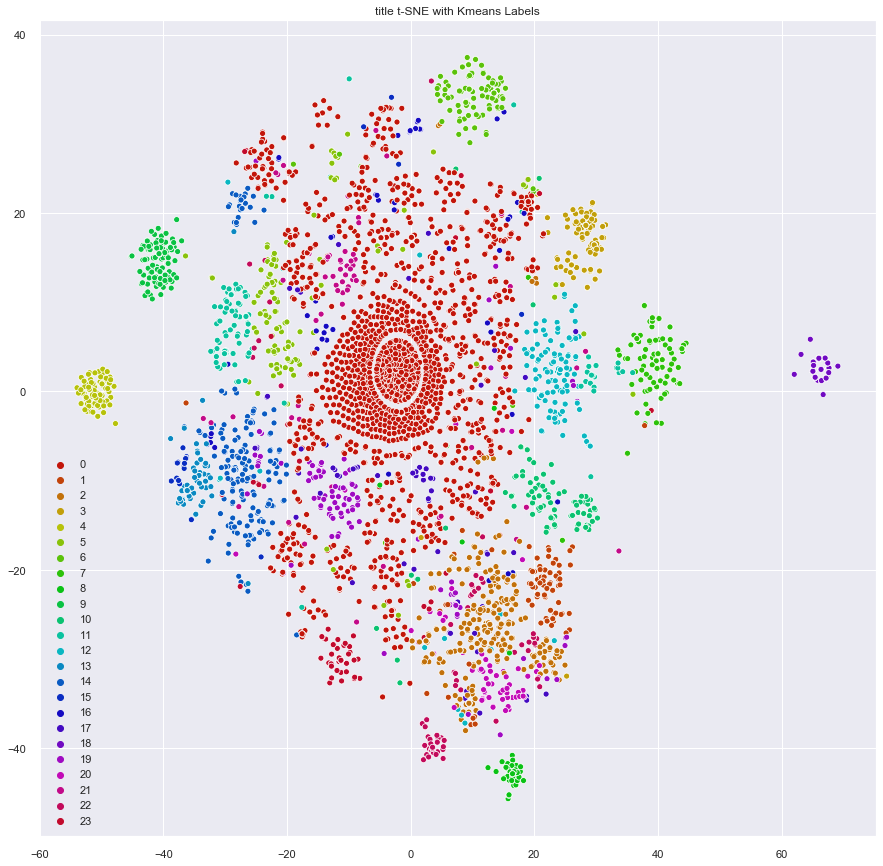

In [37]:
#initialize sns to overlay the clustering predictions
sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(24, l=.4, s=.9)

# plot
sns.scatterplot(title_tsne[:,0], title_tsne[:,1], hue=title_preds, legend='full', palette=palette)
plt.title('title t-SNE with Kmeans Labels')
plt.savefig("title_tsne_labels_Group5.png")
plt.show()

### Save dataframes for use in classification model

In [38]:
#save data_title as csv for classification
data_title.to_csv('title_clustered.csv', index=False)

In [39]:
#save tfidf WITHOUT PCA for classification
tfidf.to_csv('tfidf_clustered.csv', index=False)